In [ ]:
#Configuration environment
import os

os.environ['KAGGLE_USERNAME'] = "p***1" # username from the json file
os.environ['KAGGLE_KEY'] = "6***0" # key from the json file

In [ ]:
!kaggle datasets download -d varpit94/disaster-images-dataset

disaster-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip disaster-images-dataset.zip

Archive:  disaster-images-dataset.zip
replace Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [ ]:
import pathlib
data_dir = pathlib.Path("/content/Comprehensive Disaster Dataset(CDD)")
data_dir

PosixPath('/content/Comprehensive Disaster Dataset(CDD)')

In [ ]:
list(data_dir.glob('*/*.png'))[:5]

[PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0022.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0220.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0086.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0113.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Human_Damage/02_0042.png')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

1276


In [ ]:
earthquake = list(data_dir.glob('Damaged_Infrastructure/Earthquake/*'))
earthquake[:5]

[PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0031.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0017.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0029.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0019.png'),
 PosixPath('/content/Comprehensive Disaster Dataset(CDD)/Damaged_Infrastructure/Earthquake/05_02_0012.png')]

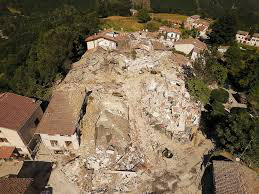

In [ ]:
import PIL
PIL.Image.open(str(earthquake[1]))

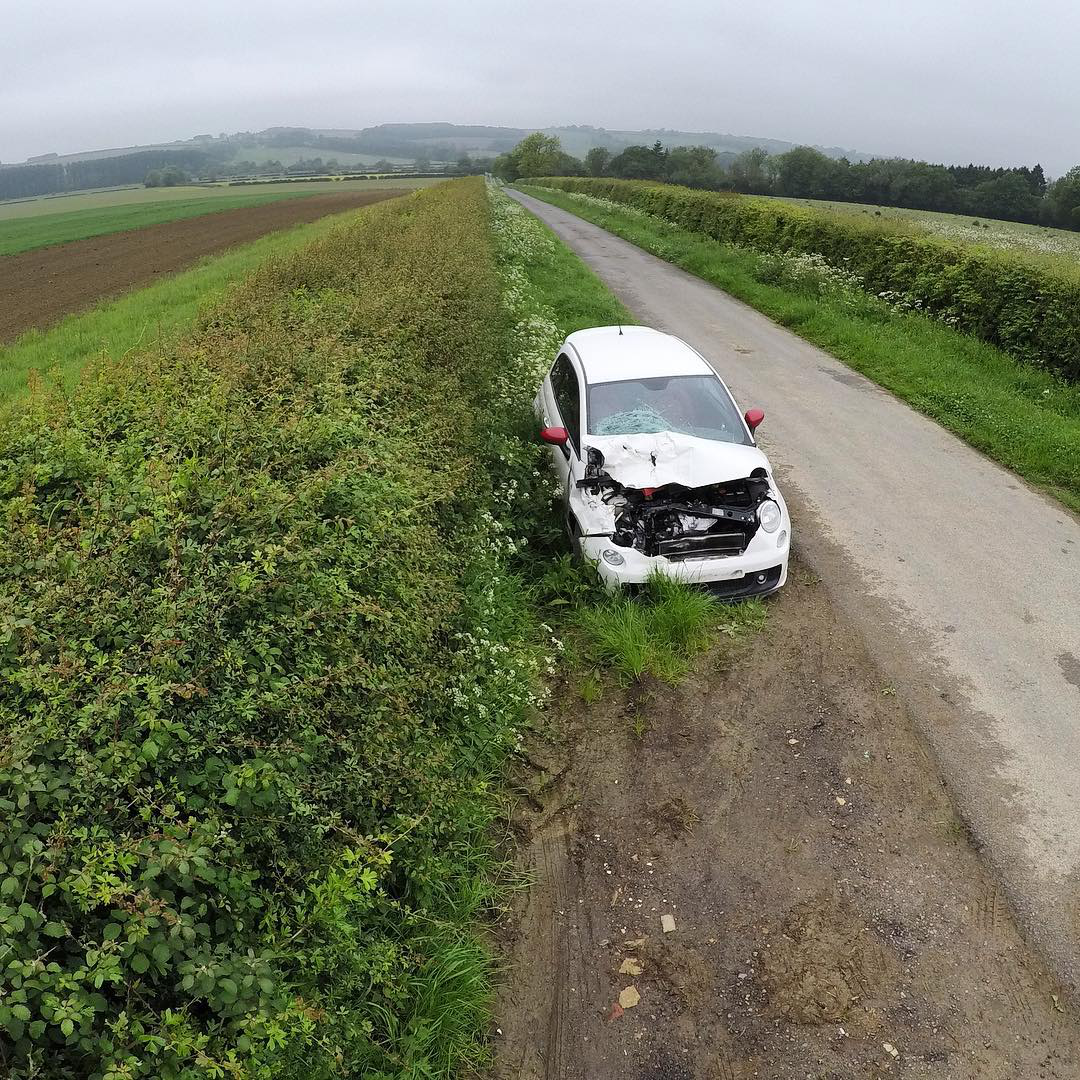

In [ ]:
Damaged_Infrastructure = list(data_dir.glob('Damaged_Infrastructure/Infrastructure/*'))
PIL.Image.open(str(Damaged_Infrastructure[0]))

In [ ]:
disaster_images_dict = {
    'earthquake': list(data_dir.glob('Damaged_Infrastructure/Earthquake/*')),
    'damaged_infrastructure': list(data_dir.glob('Damaged_Infrastructure/Infrastructure/*')),
    'urban_fire': list(data_dir.glob('Fire_Disaster/Urban_Fire/*')),
    'wild_fire': list(data_dir.glob('Fire_Disaster/Wild_Fire/*')),
    'human_damage': list(data_dir.glob('Human_Damage/*')),
    'drought': list(data_dir.glob('Land_Disaster/Drought/*')),
    'land_slide': list(data_dir.glob('Land_Disaster/Land_Slide/*')),
    'non_damage_buildings_street': list(data_dir.glob('Non_Damage/Non_Damage_Buildings_Street/*')),
    'non_damage_wildfire_forest': list(data_dir.glob('Non_Damage/Non_Damage_Wildlife_Forest/*')),
    'non_damaged_human': list(data_dir.glob('Non_Damage/human/*')),
    'non_damaged_sea': list(data_dir.glob('Non_Damage/sea/*')),
    'water_disaster': list(data_dir.glob('Water_Disaster/*'))
}

In [ ]:
disaster_labels_dict = {
    'earthquake':0,
    'damaged_infrastructure':1, 
    'urban_fire': 2,
    'wild_fire':3,
    'human_damage':4, 
    'drought':5,
    'land_slide':6, 
    'non_damage_buildings_street':7, 
    'non_damage_wildfire_forest':8,
    'non_damaged_human':9,
    'non_damaged_sea':10,
    'water_disaster': 11
}

In [ ]:
X, y = [], []

for disaster_name, images in disaster_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        try:
           resized_img = cv2.resize(img, IMAGE_SHAPE)
        except:
          break
        X.append(resized_img)
        y.append(disaster_labels_dict[disaster_name])

       

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
#Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train[:4].shape

(4, 224, 224, 3)

In [ ]:
X1, X2, X3, X4, X5=np.split(X_train[:-4], 5)

In [ ]:
X_test_scaled = X_test / 255

In [ ]:
#X_train_scaled1 = X1/255

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

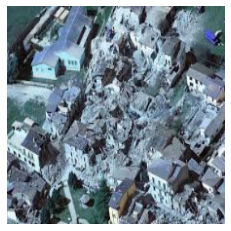

In [ ]:
plt.axis('off')
plt.imshow(X[0])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 795])

In [ ]:
print('hi')

hi


In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_disasters = 12

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_disasters)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 12)                15372     
Total params: 2,273,356
Trainable params: 15,372
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
X_train_scaled1 = X1/255

In [ ]:
#X_train_scaled2 = X2/255

In [ ]:
#X_train_scaled3 = X1/255

In [ ]:
#X_train_scaled1 = X1/255

In [ ]:
#X_train_scaled1 = X1/255